In [17]:
# Importing pre-requisite libraries
import numpy as np # For mathematical calculations
import pandas as pd # For dealing with dataframes (i.e. pd.read_csv())
import time # Measuring start and end training times
import matplotlib.pyplot as plt # Displaying graphs 
import seaborn as sns

# 1. Comprehending the data 

## Opening CSV + Checking for missing values

In [18]:
file_path = r'C:\\Users\\Khalid\\Desktop\\ML Projects\\Intermediate\\Credit Card Fraud\\creditcard.csv'

# Load the CSV file
df = pd.read_csv(file_path)

In [19]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [21]:
missing_values = df.isnull().sum()
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# 2. Data Preprocessing

## Scaling + distribution

In [22]:
# We can see from the dataset that the V1, V2, V3 values aren't understandable and the only sensible pieces of data are amount and time
# Due to this, we can scale these features with robust scaler to mitigate outliers (data that falls out of place)
# We will do this by creating new features (feature engineering) called 'scaled_amount' and 'scaled_time'

from sklearn.preprocessing import RobustScaler

# Initialize the scalers
rob_scaler = RobustScaler()

# Scale 'Amount' and 'Time' columns
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original 'Time' and 'Amount' columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Insert the scaled features at the beginning of the dataframe
df.insert(0, 'scaled_amount', df.pop('scaled_amount'))
df.insert(1, 'scaled_time', df.pop('scaled_time'))

In [23]:
# Checking the percentage of frauded and non-frauded cases

print("Non frauded cases: ", round(df['Class'].value_counts()[0]/len(df) 
                                   * 100, 2), "% of the dataset.")

print("Frauded cases: ", round(df['Class'].value_counts()[1]/len(df) 
                                   * 100, 2), "% of the dataset.")


Non frauded cases:  99.83 % of the dataset.
Frauded cases:  0.17 % of the dataset.


## Random Undersampling 

In [24]:
# New dataframes for frauded and non-frauded transactions
# We are already aware that there's 492 frauded transactions
# Therefore, we've limited the non frauded transactions to 492 to prevent overfitting

# Due to the reduced dataframe size, there is a risk of inaccuracy

frauded_df = df.loc[df['Class'] == 1]
non_frauded_df = df.loc[df['Class'] == 0][:492]

balanced_df = pd.concat([frauded_df, non_frauded_df]) # Joining the two dataframes together

# Sampling the dataset
new_df = balanced_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
121,-0.179976,-0.994079,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,...,0.052828,-0.201681,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,0
248296,-0.307413,0.812780,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,...,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1
239,-0.027947,-0.993104,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,...,-0.119439,0.070051,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,0
239501,3.007895,0.768888,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,...,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1
143336,3.226717,0.006967,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,...,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1


In [25]:
# Now the number of frauded and non-frauded cases are even
# Though there's a risk of accuracy loss due to dataframe being diluted
# 200,000+ --> 984

print("Non frauded cases: ", round(new_df['Class'].value_counts()[0]/len(new_df) 
                                   * 100, 2), "% of the dataset.")

print("Frauded cases: ", round(new_df['Class'].value_counts()[1]/len(new_df) 
                                   * 100, 2), "% of the dataset.")


Non frauded cases:  50.0 % of the dataset.
Frauded cases:  50.0 % of the dataset.


### We can now see that the dataset is now equal, though there is a huge loss in data which can affect accuracy 

## Checking the distribution of data in the new dataset (Undersampling)

In [26]:
from sklearn.decomposition import PCA # Dimensonality reduction
from sklearn.manifold import TSNE # Dimensionality reduction

In [27]:
# For this instance, we will use T-SNE to reduce the dimensonality of the data and find the distributions in the datapoints

m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(new_df)

tsne_features[1:4,:]


array([[ 29.375196 , -20.010551 ],
       [-13.6016245, -15.1690645],
       [ 21.371073 ,   0.8158514]], dtype=float32)

In [28]:
new_df['x'] = tsne_features[:,0]
new_df['y'] = tsne_features[:,1]

In [29]:
# T-SNE approach to random undersampled data

t0 = time.time() 
TSNE_X = TSNE(n_components=2, random_state=42).fit_transform(new_df.values)
t1 = time.time()
print("Time taken for T-SNE reduction {:.2} s".format(t1-t0))

Time taken for T-SNE reduction 2.0 s


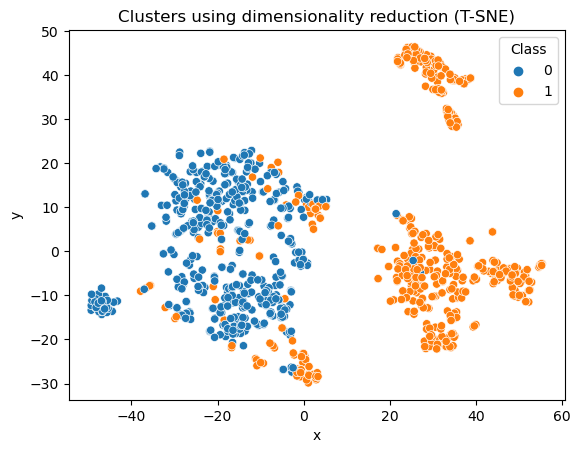

In [30]:
plt.title("Clusters using dimensionality reduction (T-SNE)")

# T-SNE scatter plot
sns.scatterplot(x="x", y="y", hue="Class", data=new_df)
plt.show()

## Oversampling (SMOTE) 

In [31]:
from sklearn.linear_model import LogisticRegression # Alternative model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [32]:
from sklearn.model_selection import train_test_split # Seperating the training and testing process
from imblearn.over_sampling import SMOTE # Handling imbalanced data within the dataset
from sklearn.model_selection import cross_val_score # Seperating the training and testing process
from sklearn.metrics import confusion_matrix, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

### Once imported all libraries for oversampling, proceed to the training section

# 3. Training 

## Undersampled Training 

In [35]:
# Models for training
from sklearn.ensemble import RandomForestClassifier # Will be used for the model
from xgboost import XGBClassifier # Alternative gradient boosting model
from sklearn.linear_model import LogisticRegression # Alternative model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [36]:
# Prerequisite libraries for parameter tuning, checking progression of models etc.
from sklearn.model_selection import learning_curve # For overfitting detection
from sklearn.model_selection import train_test_split # Seperating the training and testing process
from sklearn.model_selection import cross_val_score # For overfitting detection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report, ConfusionMatrixDisplay # For confusion metrics as we are dealing with binary classification ('1' and '0')
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit # To check the learning progression of models overtime from training to testing
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Hyperparameter tuning
from scipy.stats import uniform
from scipy.stats import randint

In [37]:
# Undersampled dataset split
y_undersampled = new_df['Class']  # Target predictor to determine frauded transactions
X_undersampled = new_df.drop(columns=['Class'])  # Dropping the target predictor column

# Test-train split for undersampled data
X_train_under, X_valid_under, y_train_under, y_valid_under = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42)

### Defining Classifiers 

In [38]:
undersampled_classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "SVC": SVC()
}

### Cross-validation through each of the items to get best scores 

In [39]:
# Looping through the list utilizing cross validation medium to get best scores best on train test split (without tuning)
for key, undersampled_classifiers in undersampled_classifiers.items():
    undersampled_classifiers.fit(X_train_under, y_train_under)
    training_score = cross_val_score(undersampled_classifiers, X_train_under, y_train_under, cv=5)
    print("Classifiers: ", undersampled_classifiers.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score (not tuned)")

C:\Users\Khalid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Khalid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Classifiers:  LogisticRegression Has a training score of 98.0 % accuracy score (not tuned)
Classifiers:  KNeighborsClassifier Has a training score of 95.0 % accuracy score (not tuned)
Classifiers:  SVC Has a training score of 93.0 % accuracy score (not tuned)


## Hyperparameter tuning

### RandomizedSearchCV to find alternative ideal parameters 

In [40]:
# Logistic regression 

log_param_grid = {"C": np.logspace(-3,3,7), "penalty":["l1", "l2"]} # Parameter grid

log_param_reg = RandomizedSearchCV(LogisticRegression(max_iter=1000), 
                                  log_param_grid)

log_param_reg.fit(X_train_under, y_train_under)

print(f"Best parameters: {log_param_reg.best_params_}")

random_log_model = log_param_reg.best_estimator_

best_log_params_random = log_param_reg.best_params_ # Extract the best parameters

# K-nearest neighbours 

knearest_param_grid = {'n_neighbors': randint(1, 30),
                      'weights': ['uniform', 'distance'],
                      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                      'leaf_size': randint(20, 50),
                      'p': [1, 2]
                      } # Parameter grid

knearest_param_reg = RandomizedSearchCV(KNeighborsClassifier(), knearest_param_grid)

knearest_param_reg.fit(X_train_under, y_train_under)

print(f"Best parameters: {knearest_param_reg.best_params_}")

random_k_nearest_model = knearest_param_reg.best_estimator_

best_k_nearest_params_random = knearest_param_reg.best_params_ # Extract the best parameters


# SVC

svc_param_grid = {'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']} # Parameter grid

svc_param_reg = RandomizedSearchCV(SVC(), svc_param_grid, cv=5, random_state=42)

svc_param_reg.fit(X_train_under, y_train_under)

print(f"Best parameters: {svc_param_reg.best_params_}")

random_svc_model = svc_param_reg.best_estimator_

best_svc_params_random = svc_param_reg.best_params_ # Extract the best parameters


C:\Users\Khalid\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Khalid\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Khalid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Khalid\anaconda3\Lib\site-packages\sklearn\linear_model

Best parameters: {'penalty': 'l2', 'C': 10.0}
Best parameters: {'algorithm': 'ball_tree', 'leaf_size': 42, 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
Best parameters: {'kernel': 'linear', 'C': 0.5}


### Hyperparameter tuning with GridSearchCV (Undersampling)

In [41]:
# Defining all models and parameter grids to find best parameter (hyperparametertuning)

# Logistic Regression Model

log_param_grid = {
    'C': [best_log_params_random['C']/2, best_log_params_random['C'], best_log_params_random['C']*2],
    'penalty': [best_log_params_random['penalty']]
}

grid_log_reg = GridSearchCV(estimator=LogisticRegression(solver='liblinear'), param_grid=log_param_grid, cv=5)

grid_log_reg.fit(X_train_under, y_train_under)

best_log_model = grid_log_reg.best_estimator_ # Retrieve the best tuned model for logistic regression


# K-nearest neighbors model

knearest_params = {
    'n_neighbors': [best_k_nearest_params_random['n_neighbors']-2, 
                   best_k_nearest_params_random['n_neighbors'],
                   best_k_nearest_params_random['n_neighbors']+2],
    'weights': [best_k_nearest_params_random['weights']],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knearest_reg = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knearest_params)

knearest_reg.fit(X_train_under, y_train_under)

best_k_nearest_model = knearest_reg.best_estimator_

# SVC model

svc_param_grid = {
    'C': [best_svc_params_random['C']-2,
         best_svc_params_random['C'],
         best_svc_params_random['C']+2,],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']       
}

grid_svc = GridSearchCV(SVC(), svc_param_grid)

grid_svc.fit(X_train_under, y_train_under)

best_svc_model = knearest_reg.best_estimator_

print("Best parameters (Logistic Regression Model): ", grid_log_reg.best_params_)
print("Best parameters (K-Nearest Neigbours): ", knearest_reg.best_params_)
print("Best parameters (SVC): ", grid_svc.best_params_)


Best parameters (Logistic Regression Model):  {'C': 10.0, 'penalty': 'l2'}
Best parameters (K-Nearest Neigbours):  {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}
Best parameters (SVC):  {'C': 2.5, 'kernel': 'linear'}


C:\Users\Khalid\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Khalid\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Khalid\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\Users\Khalid\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Khalid\anaconda3\Lib\site-packages\

### Cross-validation after further refining with RandomizedSearchCV and GridSearchCV (Undersampling)

In [42]:
log_reg_score = cross_val_score(best_log_model, X_train_under, y_train_under, cv=5)

print("Logistic Regression Cross-Validation score: ", round(log_reg_score.mean() * 100, 2), "%")

knearest_reg_score = cross_val_score(best_k_nearest_model, X_train_under, y_train_under, cv=5)

print("K-Nearest Neighbours Cross-Validation score: ", round(knearest_reg_score.mean() * 100, 2), "%")

svc_reg_score = cross_val_score(best_svc_model, X_train_under, y_train_under, cv=5)

print("SVC Cross-Validation score: ", round(svc_reg_score.mean() * 100, 2), "%")


Logistic Regression Cross-Validation score:  98.86 %
K-Nearest Neighbours Cross-Validation score:  95.3 %
SVC Cross-Validation score:  95.3 %


### Cross-validation with only RandomizedSearchCV (Undersampling) 

In [43]:
random_log_score = cross_val_score(random_log_model, X_train_under, y_train_under, cv=5)

print("Logistic Regression Cross-Validation score: ", round(random_log_score.mean() * 100, 2), "%")

random_knearest_score = cross_val_score(random_k_nearest_model, X_train_under, y_train_under, cv=5)

print("K-Nearest Neighbours Cross-Validation score: ", round(random_knearest_score.mean() * 100, 2), "%")

random_svc_score = cross_val_score(random_svc_model, X_train_under, y_train_under, cv=5)

print("SVC Cross-Validation score: ", round(random_svc_score.mean() * 100, 2), "%")

Logistic Regression Cross-Validation score:  98.98 %
K-Nearest Neighbours Cross-Validation score:  95.3 %
SVC Cross-Validation score:  98.98 %


### The RandomizedSearchCV has performed better than the GridSearchCV within the training data, which could imply overfitting. This will be checked fully in the testing section.

In [44]:
# Learning curve for all undersampled models

## Oversampled Training

In [63]:
from sklearn.pipeline import Pipeline # Pipelining for models
from imblearn.pipeline import make_pipeline
from scipy.stats import randint # For parameter grid number generation
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline # For imbalanced dataset handling
from sklearn.model_selection import StratifiedShuffleSplit # For pipeline to assist with splitting and stratifying each class on training and testing to original data

In [64]:
# Define classifiers
oversampled_classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
}


In [65]:
# Preset target column and drop the target column
y_oversampled = df['Class']
X_oversampled = df.drop('Class', axis=1)

# Test-train split for oversampled data
X_train_over, X_valid_over, y_train_over, y_valid_over = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

In [66]:
# Checking the length of training and testing data

print('Length of X (train) {} | Length of y (train): {}'.format(len(X_train_over), 
                                                            len(y_valid_over)))

print('Length of X (test) {} | Length of y (test): {}'.format(len(X_train_over), 
                                                            len(y_valid_over)))

Length of X (train) 227845 | Length of y (train): 56962
Length of X (test) 227845 | Length of y (test): 56962


## Hyperparameter Tuning (Oversampling Approach)

### Cross-validation + oversampling

In [67]:
# Define the parameter grid for logistic regression
log_param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'logisticregression__penalty': ['l1', 'l2']
}

# Stratified ShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

f1_scores = []

# Use StratifiedShuffleSplit to avoid data leakage
for train_index, test_index in sss.split(X_train_over, y_train_over):
    # Create the pipeline with SMOTE and logistic regression
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority', random_state=42),
                                        LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000))

    # Apply GridSearchCV within the pipeline
    grid_log_reg = GridSearchCV(pipeline, param_grid=log_param_grid, cv=5, scoring='f1', n_jobs=-1)

    # Fit the model with training data from the current fold
    grid_log_reg.fit(X_train_over.iloc[train_index], y_train_over.iloc[train_index])

    # Make predictions on the test data from the current fold
    y_pred_over = grid_log_reg.predict(X_train_over.iloc[test_index])

    # Calculate the F1 score for the current fold
    f1 = f1_score(y_train_over.iloc[test_index], y_pred_over)
    f1_scores.append(f1)
    print(f'Fold F1 Score: {f1:.4f}')

print(f'Mean F1 Score: {np.mean(f1_scores):.4f}')

# Print best parameters using best_estimator_
print(f"\nBest parameters for Logistic Regression: {grid_log_reg.best_params_}")

# Validate on the entire validation set
best_model = grid_log_reg.best_estimator_
best_model.fit(X_train_over, y_train_over)
y_valid_pred_over = best_model.predict(X_valid_over)
validation_f1 = f1_score(y_valid_over, y_valid_pred_over)

print(f'\nValidation F1 Score: {validation_f1:.4f}')

Fold F1 Score: 0.1258
Fold F1 Score: 0.1274
Fold F1 Score: 0.1242
Fold F1 Score: 0.1325
Fold F1 Score: 0.1320
Mean F1 Score: 0.1284

Best parameters for Logistic Regression: {'logisticregression__C': 0.001, 'logisticregression__penalty': 'l1'}

Validation F1 Score: 0.1308


# 4. Testing 

## Undersampled Models

### Logistic Regression Model (RandomSearchCV)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        87
           1       0.99      0.99      0.99       110

    accuracy                           0.99       197
   macro avg       0.99      0.99      0.99       197
weighted avg       0.99      0.99      0.99       197

0.9897074190177639


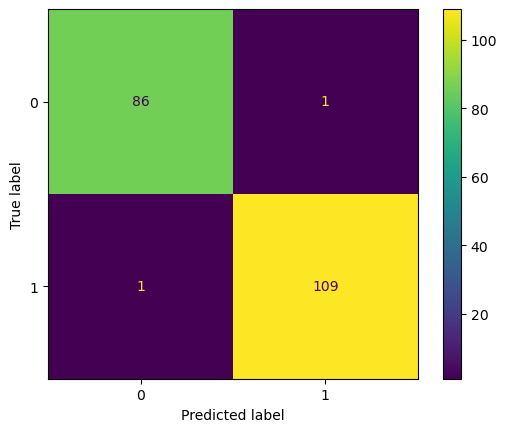

In [55]:
random_log_model.fit(X_train_under, y_train_under) # Fitting the model

# Making predictions
random_log_pred = random_log_model.predict(X_valid_under)


# Unbalanced datasets cannot use typical 'MAE, MSE' metrics for accuracy, therefore we use confusion matrixes
print(classification_report(y_valid_under, random_log_pred))
print(roc_auc_score(y_valid_under, random_log_pred))

undersampled_lr_random_cm = confusion_matrix(y_valid_under, random_log_pred, labels=random_log_model.classes_)
undersampled_lr_random_disp = ConfusionMatrixDisplay(confusion_matrix=undersampled_lr_random_cm,
                                             display_labels=random_log_model.classes_)

undersampled_lr_random_disp.plot()

plt.show() # Display the confusion matrix plot

### Logistic Regression Model (GridSearchCV)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        87
           1       0.98      0.99      0.99       110

    accuracy                           0.98       197
   macro avg       0.99      0.98      0.98       197
weighted avg       0.98      0.98      0.98       197

0.9839602925809823


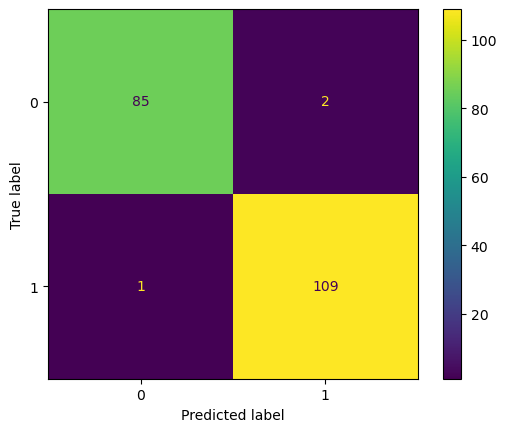

In [57]:
best_log_model.fit(X_train_under, y_train_under) # Fitting the model

# Making predictions
grid_log_pred = best_log_model.predict(X_valid_under)


# Unbalanced datasets cannot use typical 'MAE, MSE' metrics for accuracy, therefore we use confusion matrixes
print(classification_report(y_valid_under, grid_log_pred))
print(roc_auc_score(y_valid_under, grid_log_pred))

undersampled_lr_grid_cm = confusion_matrix(y_valid_under, grid_log_pred, labels=best_log_model.classes_)
undersampled_lr_grid_disp = ConfusionMatrixDisplay(confusion_matrix=undersampled_lr_grid_cm,
                                             display_labels=best_log_model.classes_)

undersampled_lr_grid_disp.plot()

plt.show() # Display the confusion matrix plot

### K-Nearest Classifier (RandomSearchCV)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        87
           1       0.99      0.91      0.95       110

    accuracy                           0.94       197
   macro avg       0.94      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197

0.9487983281086729


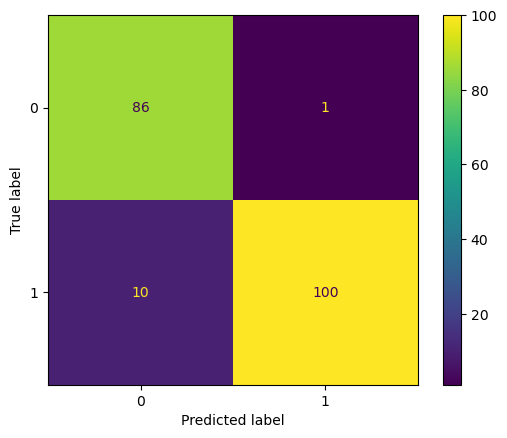

In [58]:
random_k_nearest_model.fit(X_train_under, y_train_under) # Fitting the model

# Making predictions
random_k_nearest_pred = random_k_nearest_model.predict(X_valid_under)


# Unbalanced datasets cannot use typical 'MAE, MSE' metrics for accuracy, therefore we use confusion matrixes
print(classification_report(y_valid_under, random_k_nearest_pred))
print(roc_auc_score(y_valid_under, random_k_nearest_pred))

undersampled_k_nearest_random_cm = confusion_matrix(y_valid_under, random_k_nearest_pred, labels=random_k_nearest_model.classes_)
undersampled_k_nearest_random_disp = ConfusionMatrixDisplay(confusion_matrix=undersampled_k_nearest_random_cm,
                                                           display_labels=random_k_nearest_model.classes_)

undersampled_k_nearest_random_disp.plot()

plt.show() # Display the confusion matrix plot


### K-Nearest Classifier (GridSearchCV) 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        87
           1       0.99      0.91      0.95       110

    accuracy                           0.94       197
   macro avg       0.94      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197

0.9487983281086729


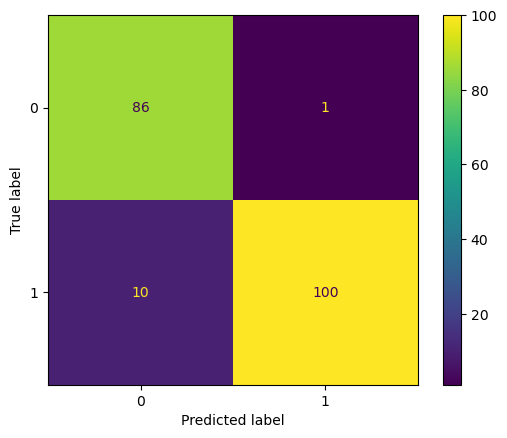

In [59]:
best_k_nearest_model.fit(X_train_under, y_train_under) # Fitting the model

# Making predictions
grid_k_nearest_pred = best_k_nearest_model.predict(X_valid_under)


# Unbalanced datasets cannot use typical 'MAE, MSE' metrics for accuracy, therefore we use confusion matrixes
print(classification_report(y_valid_under, grid_k_nearest_pred))
print(roc_auc_score(y_valid_under, grid_k_nearest_pred))

undersampled_k_nearest_grid_cm = confusion_matrix(y_valid_under, grid_k_nearest_pred, labels=best_k_nearest_model.classes_)
undersampled_k_nearest_grid_disp = ConfusionMatrixDisplay(confusion_matrix=undersampled_k_nearest_grid_cm, 
                                                         display_labels=best_k_nearest_model.classes_)

undersampled_k_nearest_grid_disp.plot()
plt.show() # Display the confusion matrix plot


### SVC Classifier (RandomSearchCV) 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        87
           1       1.00      0.99      1.00       110

    accuracy                           0.99       197
   macro avg       0.99      1.00      0.99       197
weighted avg       0.99      0.99      0.99       197

0.9954545454545455


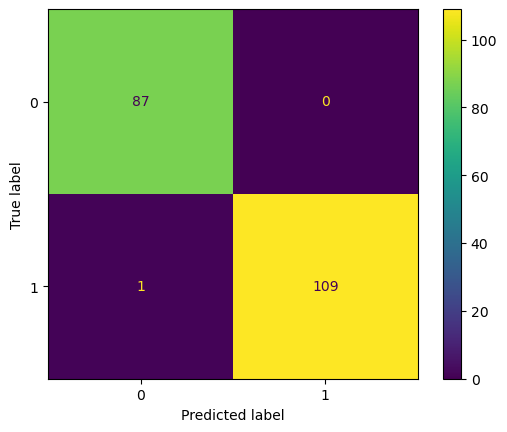

In [60]:
random_svc_model.fit(X_train_under, y_train_under) # Fitting the model

# Making predictions
random_svc_pred = random_svc_model.predict(X_valid_under) # Making predictions

# Classification tasks require confusion matrixes
print(classification_report(y_valid_under, random_svc_pred))
print(roc_auc_score(y_valid_under, random_svc_pred))

undersampled_svc_random_cm = confusion_matrix(y_valid_under, random_svc_pred, labels=random_svc_model.classes_)
undersampled_svc_random_disp = ConfusionMatrixDisplay(confusion_matrix=undersampled_svc_random_cm,
                                                     display_labels=random_svc_model.classes_)
undersampled_svc_random_disp.plot()
plt.show() # Display the confusion matrix plot

### SVC Classifier (GridSearchCV)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        87
           1       0.99      0.91      0.95       110

    accuracy                           0.94       197
   macro avg       0.94      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197

0.9487983281086729


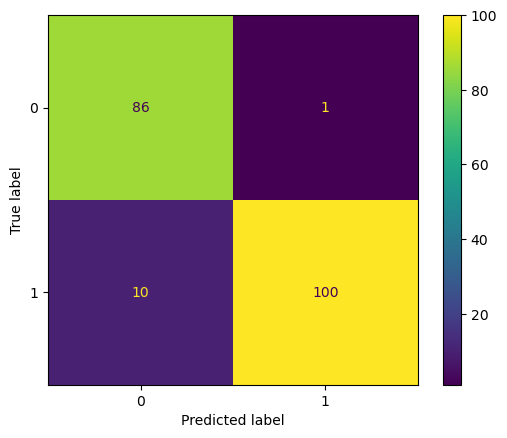

In [61]:
best_svc_model.fit(X_train_under, y_train_under) # Fitting the model

# Making predictions
best_svc_pred = best_svc_model.predict(X_valid_under) # Making predictions

# Classification tasks require confusion matrixes
print(classification_report(y_valid_under, best_svc_pred))
print(roc_auc_score(y_valid_under, best_svc_pred))

undersampled_svc_grid_cm = confusion_matrix(y_valid_under, best_svc_pred, labels=best_svc_model.classes_)
undersampled_svc_grid_disp = ConfusionMatrixDisplay(confusion_matrix=undersampled_svc_grid_cm,
                                                     display_labels=best_svc_model.classes_)
undersampled_svc_grid_disp.plot()
plt.show() # Display the confusion matrix plot

## Oversampled Models 

### Logistic Regression (RandomizedSearchCV) 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.93      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962

ROC AUC Score: 0.9537


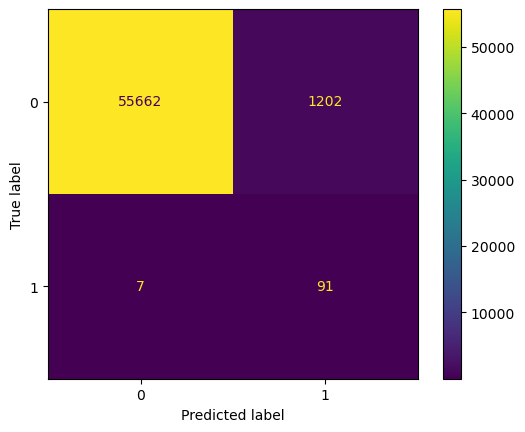

Fitting oversample data took :2.2893521785736084 sec


In [68]:
# Display Classification Report
print(classification_report(y_valid_over, y_valid_pred_over))

# Display ROC AUC Score
print(f'ROC AUC Score: {roc_auc_score(y_valid_over, y_valid_pred_over):.4f}')

# Confusion Matrix
log_reg_cf = confusion_matrix(y_valid_over, y_valid_pred_over)
ConfusionMatrixDisplay(confusion_matrix=log_reg_cf).plot()
plt.show()

# Time taken to fit the model
t0 = time.time()
best_model.fit(X_train_over, y_train_over)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

### The fraud detection performs really well on oversampling, on the other hand, the non-fraud case detection is really poor with 1,381 incorrect false positives.